<a href="https://colab.research.google.com/github/wesslen/llm-experiments/blob/main/notebooks/bootstrap_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

def bootstrap_accuracy(df, true_col, pred_col, n_bootstrap=1000):
    """
    Perform bootstrap sampling to estimate uncertainty around binary classification accuracy.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing true and predicted labels
    true_col : str
        Column name for ground truth labels (should contain 'yes'/'no')
    pred_col : str
        Column name for predicted labels (should contain 'yes'/'no')
    n_bootstrap : int
        Number of bootstrap samples (default: 1000)

    Returns:
    --------
    dict : Dictionary containing bootstrap statistics
        - 'accuracies': array of bootstrap accuracy scores
        - 'mean': mean accuracy across bootstrap samples
        - 'std': standard deviation of accuracy
        - 'ci_lower': 2.5th percentile (95% CI lower bound)
        - 'ci_upper': 97.5th percentile (95% CI upper bound)
    """
    n_samples = len(df)
    bootstrap_accuracies = []

    for _ in range(n_bootstrap):
        # Sample with replacement
        bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)
        bootstrap_sample = df.iloc[bootstrap_indices]

        # Calculate accuracy for this bootstrap sample
        correct = (bootstrap_sample[true_col] == bootstrap_sample[pred_col]).sum()
        accuracy = correct / len(bootstrap_sample)
        bootstrap_accuracies.append(accuracy)

    bootstrap_accuracies = np.array(bootstrap_accuracies)

    return {
        'accuracies': bootstrap_accuracies,
        'mean': np.mean(bootstrap_accuracies),
        'std': np.std(bootstrap_accuracies),
        'ci_lower': np.percentile(bootstrap_accuracies, 2.5),
        'ci_upper': np.percentile(bootstrap_accuracies, 97.5)
    }


Sample DataFrame:
  ground_truth model_prediction
0          yes              yes
1           no               no
2          yes               no
3          yes              yes
4           no               no
5           no              yes
6          yes              yes
7           no               no
8          yes              yes
9          yes               no

DataFrame shape: (20, 2)

Original accuracy: 0.800

Bootstrap Results:
Mean accuracy: 0.803
Standard deviation: 0.090
95% Confidence Interval: [0.600, 0.950]


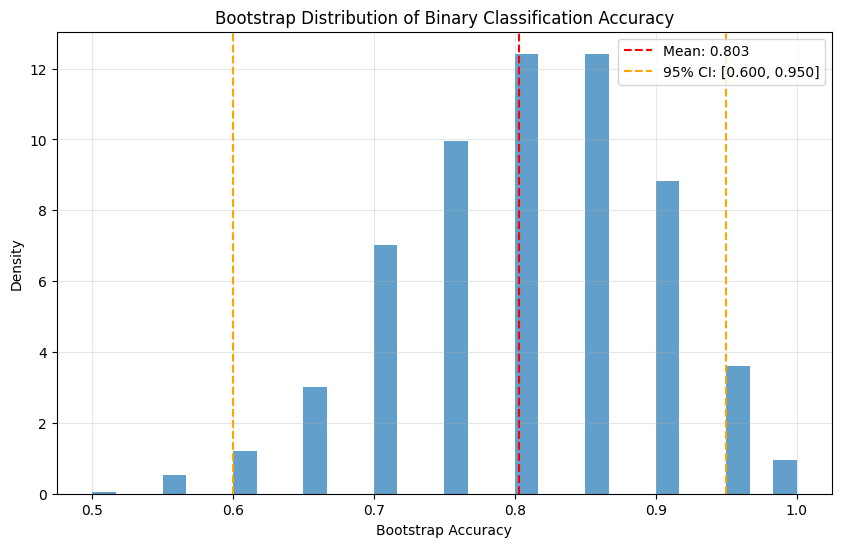

In [2]:

# Example usage and test
if __name__ == "__main__":
    # Create sample dataframe for testing
    np.random.seed(42)  # For reproducible results

    test_data = {
        'ground_truth': ['yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes',
                        'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes'],
        'model_prediction': ['yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no',
                           'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes']
    }

    df = pd.DataFrame(test_data)
    print("Sample DataFrame:")
    print(df.head(10))
    print(f"\nDataFrame shape: {df.shape}")

    # Calculate original accuracy
    original_accuracy = (df['ground_truth'] == df['model_prediction']).mean()
    print(f"\nOriginal accuracy: {original_accuracy:.3f}")

    # Perform bootstrap analysis
    results = bootstrap_accuracy(df, 'ground_truth', 'model_prediction', n_bootstrap=1000)

    print(f"\nBootstrap Results:")
    print(f"Mean accuracy: {results['mean']:.3f}")
    print(f"Standard deviation: {results['std']:.3f}")
    print(f"95% Confidence Interval: [{results['ci_lower']:.3f}, {results['ci_upper']:.3f}]")

    # Optional: Plot histogram of bootstrap accuracies
    try:
        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 6))
        plt.hist(results['accuracies'], bins=30, alpha=0.7, density=True)
        plt.axvline(results['mean'], color='red', linestyle='--', label=f'Mean: {results["mean"]:.3f}')
        plt.axvline(results['ci_lower'], color='orange', linestyle='--', label=f'95% CI: [{results["ci_lower"]:.3f}, {results["ci_upper"]:.3f}]')
        plt.axvline(results['ci_upper'], color='orange', linestyle='--')
        plt.xlabel('Bootstrap Accuracy')
        plt.ylabel('Density')
        plt.title('Bootstrap Distribution of Binary Classification Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

    except ImportError:
        print("\nMatplotlib not available - skipping visualization")